<a href="https://colab.research.google.com/github/mbeyazitkaygi/nasaappchallenges/blob/main/sonificationjwt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# We upload the csv file to the colab environment.
uploaded = files.upload()

# We check the accuracy of the uploaded file.
for filename in uploaded.keys():
    print(f"Name of uploaded csv file: {filename}")


Saving saturn.csv to saturn.csv
Yüklenen dosyanın adı: saturn.csv


In [ ]:
#We import the pandas library.
import pandas as pd

# We write the name of the csv data file.
filename = 'saturn'

#We load the data as Pandas dataframe.
df = pd.read_csv('/content/' + filename + '.csv')

#we sort the data as R G B (optional, does not affect sonification)
df = df.sort_values(by=['B'], ascending=False)

n_impacts = len(df)
print(n_impacts, 'impacts')

#We take a look at the first 5 lines.
df.head()

589824 impacts


,R,G,B
339507,243,235,232
339508,243,235,232
339509,243,235,232
331376,242,234,231
339506,242,234,231


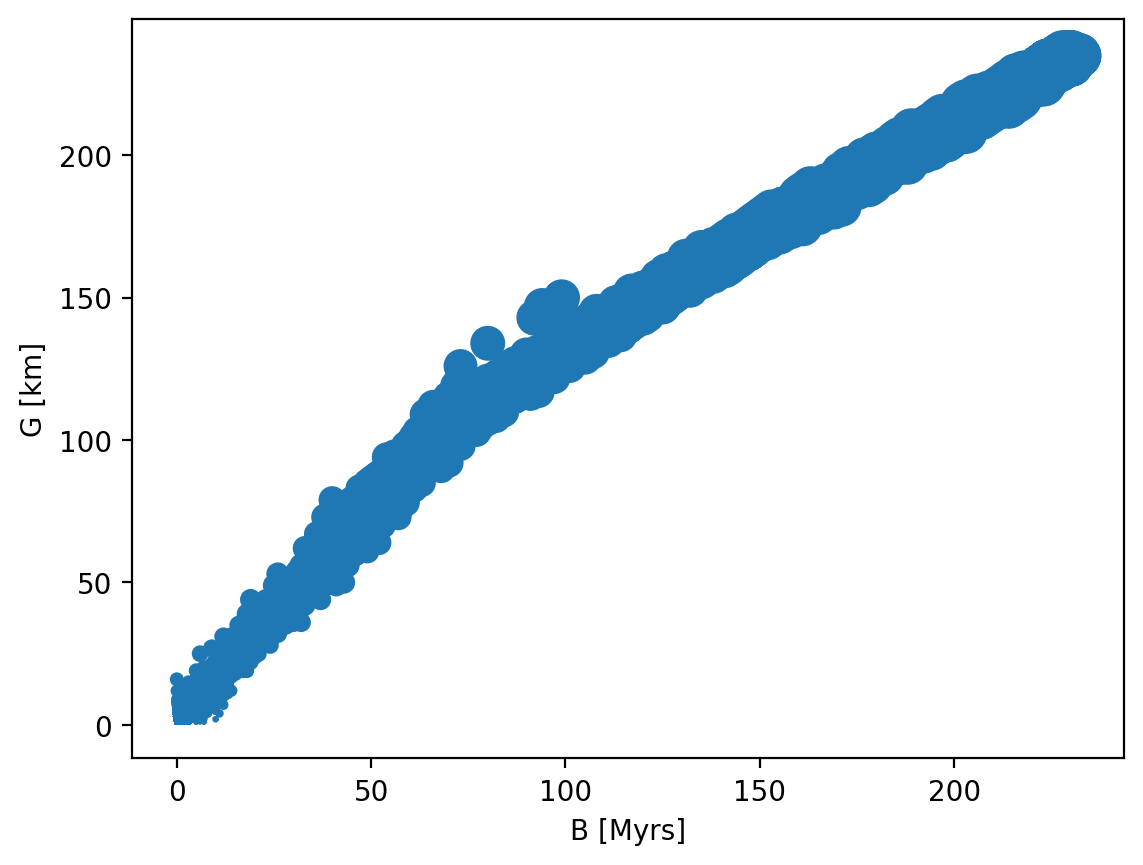

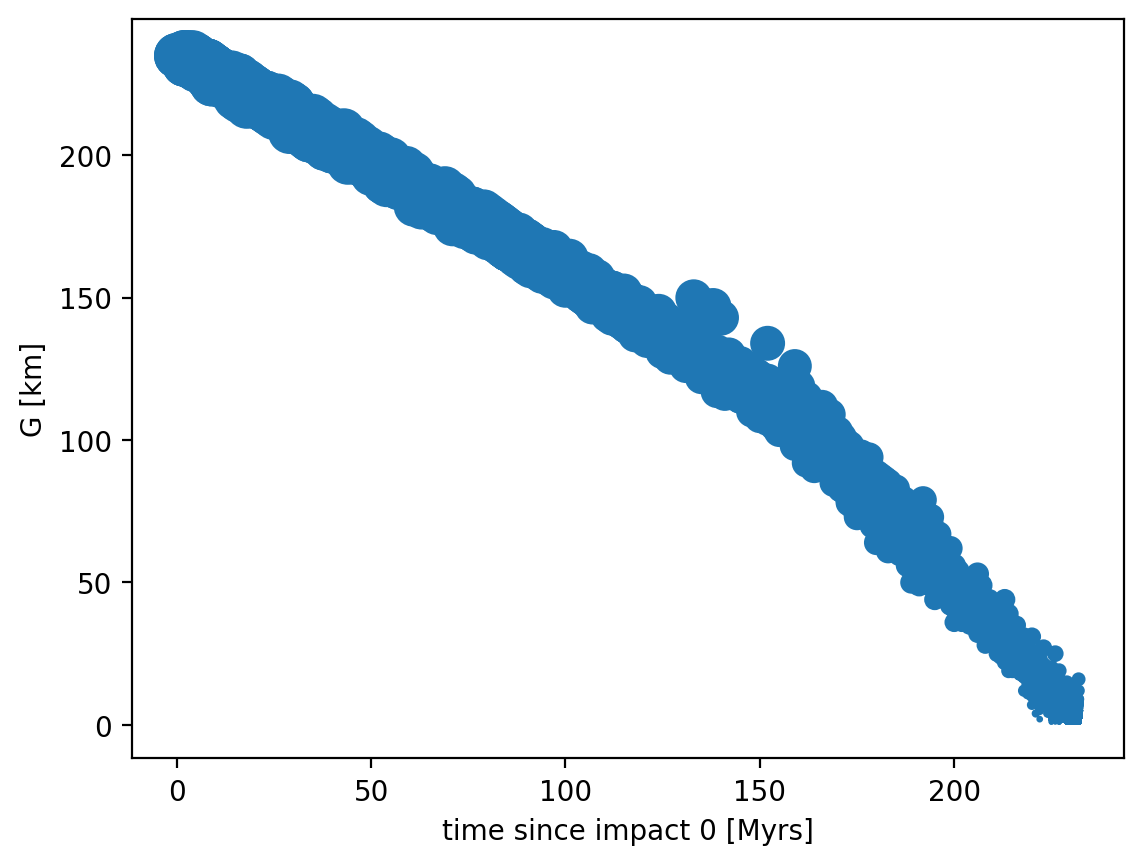

In [ ]:
#We import plotting library for visualization data.
import matplotlib.pylab as plt
ages = df['B'].values    #this is a numpy array (not a list), you can do mathematical operations directly on the object
diameters = df['G'].values

plt.scatter(ages, diameters, s=diameters)
plt.xlabel('B [Myrs]')
plt.ylabel('G [km]')
plt.show()

times_myrs = max(ages) - ages  #measure time from oldest crater (first impact) in data

plt.scatter(times_myrs, diameters, s=diameters)
plt.xlabel('time since impact 0 [Myrs]')
plt.ylabel('G [km]')
plt.show()

In [ ]:
def map_value(value, min_value, max_value, min_result, max_result):
    '''maps value (or array of values) from one range to another'''

    result = min_result + (value - min_value)/(max_value - min_value)*(max_result - min_result)
    return result


In [ ]:
myrs_per_beat = 25  #number of Myrs for each beat of music

t_data = times_myrs/myrs_per_beat #rescale time from Myrs to beats


duration_beats = max(t_data)  #duration in beats (actually, onset of last note)
print('Duration:', duration_beats, 'beats')


Duration: 9.28 beats


In [ ]:
duration_beats = 52.8 #desired duration in beats (actually, onset of last note)

t_data = map_value(times_myrs, 0, max(times_myrs), 0, duration_beats)

#or
#t_data = map_value(ages, min(ages), max(ages), duration_beats, 0)

myrs_per_beat = max(times_myrs)/duration_beats
print('Myrs per beat:', myrs_per_beat)

Myrs per beat: 4.3939393939393945


Duration: 52.8 seconds


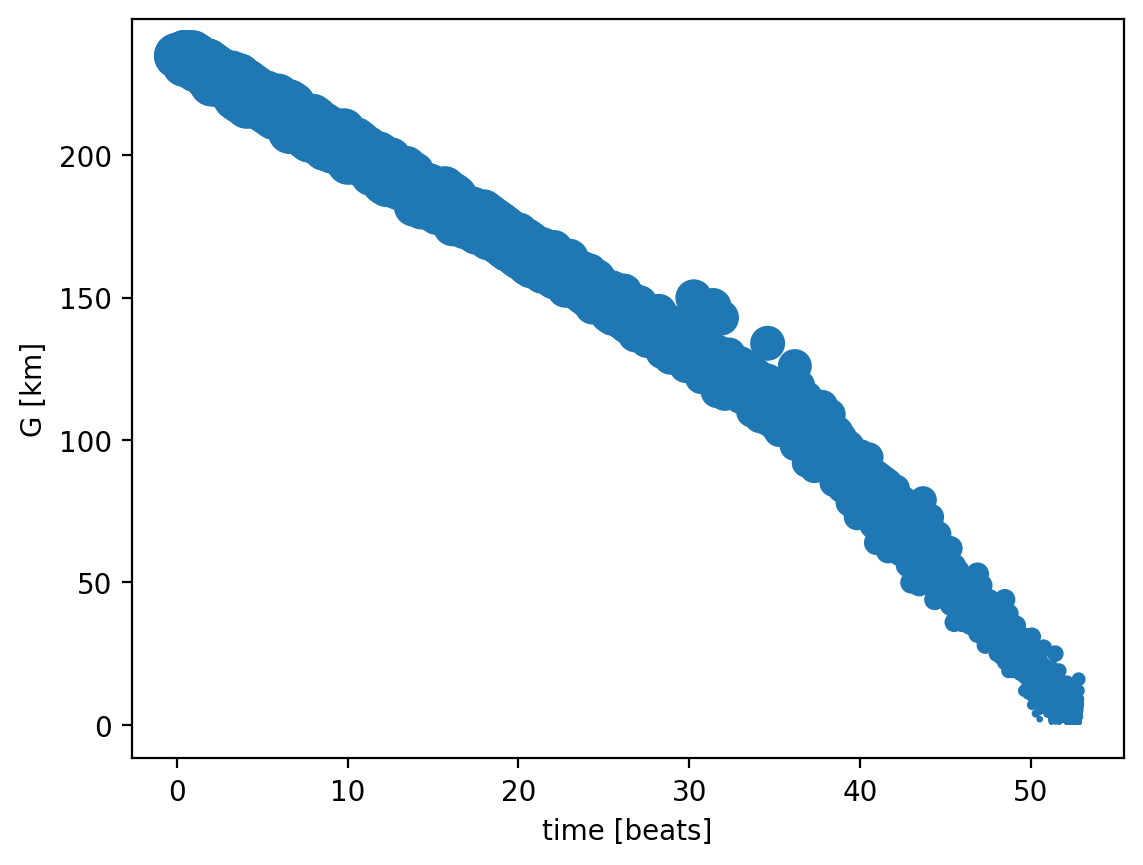

In [ ]:
#calculate duration in seconds
bpm = 60  #if bpm = 60, 1 beat = 1 sec
duration_sec = duration_beats*60/bpm #duration in seconds (actually, onset of last note)
print('Duration:', duration_sec, 'seconds')


plt.scatter(t_data, diameters, s=diameters)
plt.xlabel('time [beats]')
plt.ylabel('G [km]')
plt.show()

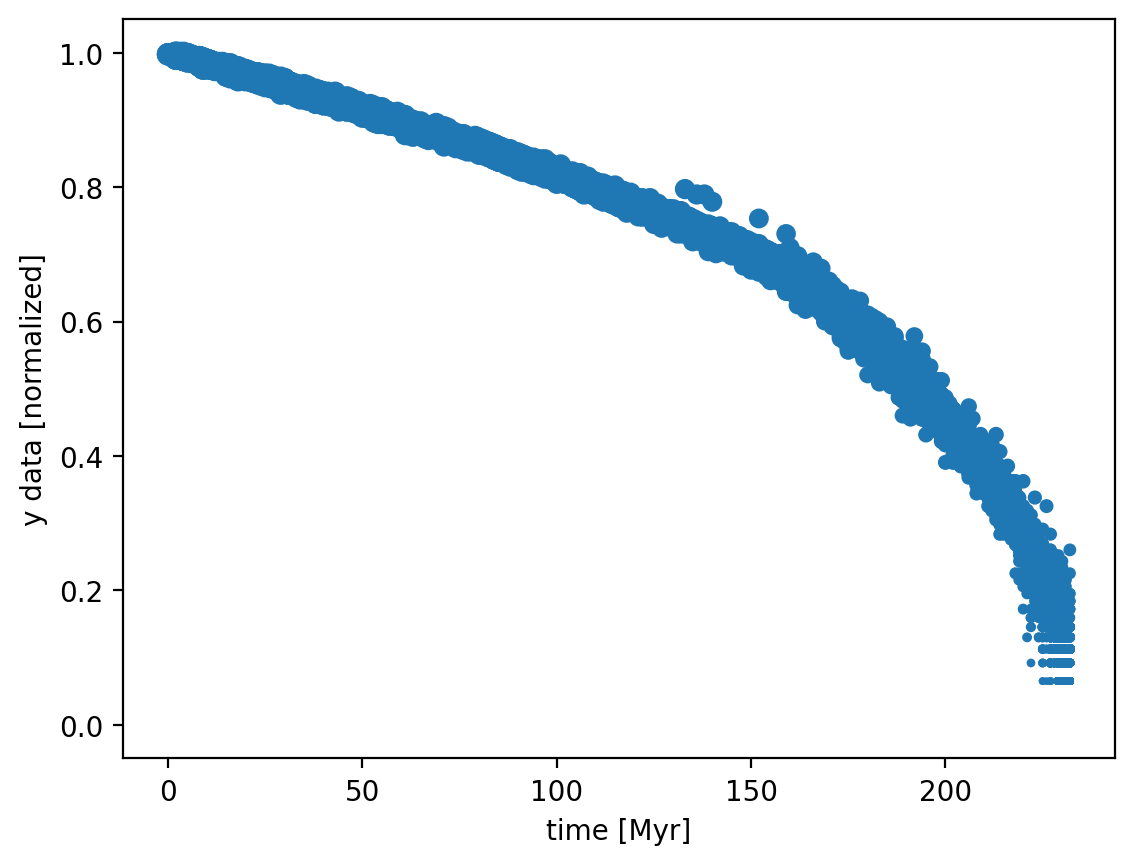

In [ ]:
y_data = map_value(diameters, min(diameters), max(diameters), 0, 1) #normalize data, so it runs from 0 to 1

y_scale = 0.5  #lower than 1 to spread out more evenly

y_data = y_data**y_scale

plt.scatter(times_myrs, y_data, s=50*y_data)
plt.xlabel('time [Myr]')
plt.ylabel('y data [normalized]')
plt.show()

In [ ]:
!pip install audiolazy

In [ ]:
!pip install --upgrade audiolazy

In [ ]:
!python --version

Python 3.10.12


In [ ]:
!pip install --upgrade audiolazy


In [ ]:
!pip uninstall audiolazy
!pip install audiolazy


Found existing installation: audiolazy 0.6
Uninstalling audiolazy-0.6:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/audiolazy-0.6.dist-info/*
    /usr/local/lib/python3.10/dist-packages/audiolazy/*
Proceed (Y/n)? y
  Successfully uninstalled audiolazy-0.6
  Using cached audiolazy-0.6-py2.py3-none-any.whl (121 kB)


In [ ]:
from music21 import note

# 4 octaves of major scale
note_names = ['C2','D2','E2','F2','G2','A2','B2',
             'C3','D3','E3','F3','G3','A3','B3',
             'C4','D4','E4','F4','G4','A4','B4',
             'C5','D5','E5','F5','G5','A5','B5']

#4 octaves of major pentatonic scale
note_names = ['C2','D2','E2','G2','A2',
             'C3','D3','E3','G3','A3',
             'C4','D4','E4','G4','A4',
             'C5','D5','E5','G5','A5']

#custom note set (a voicing of a Cmaj13#11 chord, notes from C lydian)
note_names = ['C1','C2','G2',
             'C3','E3','G3','A3','B3',
             'D4','E4','G4','A4','B4',
             'D5','E5','G5','A5','B5',
             'D6','E6','F#6','G6','A6']


# Nota isimlerini MIDI numaralarına dönüştürme
note_midis = [note.Note(n).pitch.midi for n in note_names]

n_notes = len(note_midis)
print('Çözünürlük:', n_notes, 'nota')


Çözünürlük: 23 nota


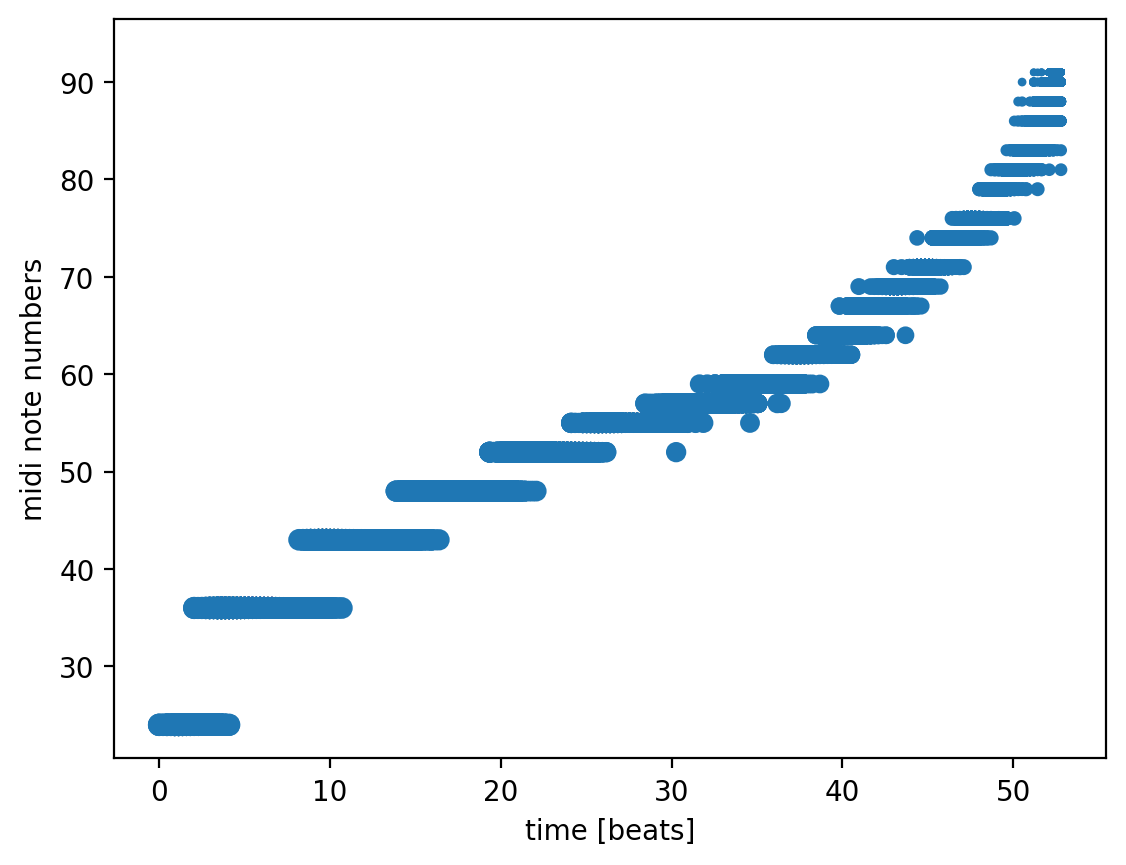

In [ ]:
midi_data = []
for i in range(n_impacts):
    note_index = round(map_value(y_data[i], 0, 1, n_notes-1, 0)) #notice choice of polarity: bigger craters are mapped to lower notes
                                                        #we round the result because it's a list index which must be an integer
    midi_data.append(note_midis[note_index])

plt.scatter(t_data, midi_data, s=50*y_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()


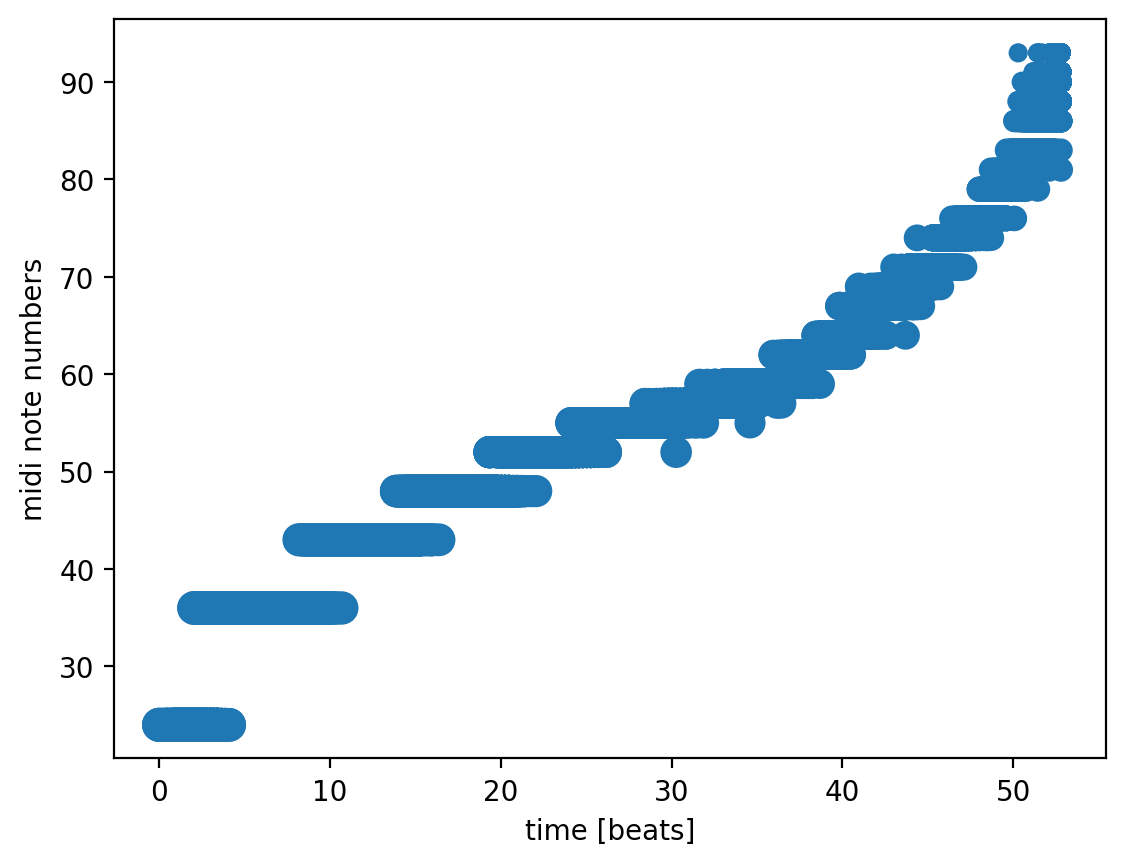

In [ ]:
vel_min,vel_max = 35,127   #minimum and maximum note velocity

vel_data = []
for i in range(n_impacts):
    note_velocity = round(map_value(y_data[i], 0, 1, vel_min, vel_max)) #bigger craters will be louder
                                                                #we round here because note velocites are integers
    vel_data.append(note_velocity)

plt.scatter(t_data, midi_data, s=vel_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()

In [ ]:
pip install midiutil

In [ ]:
from midiutil import MIDIFile #import library to make midi file, https://midiutil.readthedocs.io/en/1.2.1/

#create midi file object, add tempo
my_midi_file = MIDIFile(1) #one track
my_midi_file.addTempo(track=0, time=0, tempo=bpm)

#add midi notes
for i in range(n_impacts):
    my_midi_file.addNote(track=0, channel=0, pitch=midi_data[i], time=t_data[i], duration=2, volume=vel_data[i])

#create and save the midi file itself
with open(filename + '.mid', "wb") as f:
    my_midi_file.writeFile(f)


In [ ]:
from google.colab import files

# Dosyayı indirme işlemi
files.download(filename + '.mid')  # Download the generated MIDI file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>